# Network weight analysis

In [5]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiment import Experiment
from utils import print_stats


data_path = "../data"
save_path = "../figs"

In [2]:
exp = Experiment.load_experiment(data_path, 'baseline')

In [3]:
exp.compile_grid_cells(1)
exp.load_pfs()

In [6]:
net = exp.agent.actor
net.clamp_weights()

print("Bias stats:")
print_stats(net.b1)
print("\nWeight stats:")
print_stats(net.w1)
print("\nAggregated weight stats:")
print_stats(net.w1.sum(1))

Bias stats:
min   |max  |mean |std  |shape
-0.412|0.407|0.044|0.188|torch.Size([128])

Weight stats:
min   |max  |mean |std  |shape
0.000|11.255|0.994|0.963|torch.Size([128, 1000])

Aggregated weight stats:
min   |max  |mean |std  |shape
936.681|1097.668|994.358|48.996|torch.Size([128])


In [7]:
hidden = exp.agent_kwargs['actor_hidden']
idx = net.lin2.weight[2:].detach().cpu().abs().argsort(dim=-1)[:,-5:].numpy() + [[0], [hidden]]
print(net.lin2.weight[2:].detach().cpu().flatten()[idx.flatten()])

tensor([-10.3782, -10.5052, -10.6467, -10.9363,  11.3086,  -9.9885,  10.0321,
        -10.1837, -10.1984,  11.3482])


Layer 2 weights from active hidden units
min   |max  |mean |std  |shape
-10.936|11.348|0.066|6.000|torch.Size([2, 89])

Layer 2 weights from inactive hidden units
min   |max  |mean |std  |shape
-4.069|5.231|0.160|1.159|torch.Size([2, 39])


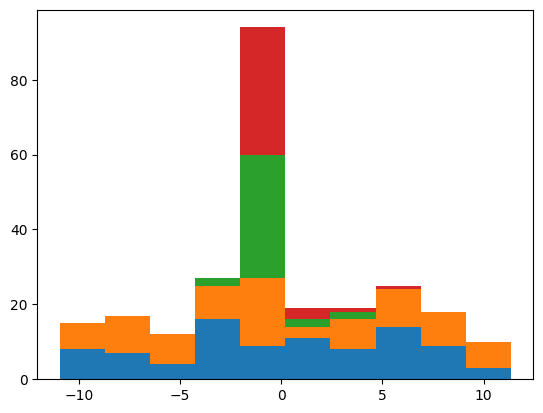

In [20]:
hidden = net.lin1(exp.grid_cells).permute((-1, 0, 1)).detach().cpu().numpy()
used = exp.pfs.scales.squeeze().cpu().detach().numpy() > 0.001

print("Layer 2 weights from active hidden units")
print_stats(net.lin2.weight[2:, used])
print("\nLayer 2 weights from inactive hidden units")
print_stats(net.lin2.weight[2:, ~used])

plt.hist([*net.lin2.weight[2:, used].detach().cpu(),
          *net.lin2.weight[2:, ~used].detach().cpu()],
         histtype='barstacked')
plt.show()